## 3. loop2geomodeller Convert map2loop files to geomodeller files

### Define Minimum Fault Length

In [1]:
from map2loop import m2l_topology
import networkx as nx

save_faults=True

### Create Project Header

In [2]:
f=open('../test_data3/m2l.taskfile','w')
f.write('#---------------------------------------------------------------\n')
f.write('#-----------------------Project Header-----------------------\n')
f.write('#---------------------------------------------------------------\n')
f.write('name: "UWA_Intrepid"\n')
f.write('description: "Automate_batch_Model"\n')
f.write('    GeomodellerTask {\n')
f.write('    CreateProject {\n')
f.write('        name: "Hamersley"\n')
f.write('        author: "Des/Mark"\n')
f.write('        date: "23/10/2019  0: 0: 0"\n')
f.write('        projection { map_projection: "GDA94 / MGA50"}\n')
f.write('        version: "2.0"\n')
f.write('        units: meters\n')
f.write('        precision: 1.0\n')
f.write('        Extents {\n')
f.write('            xmin: 500000\n')
f.write('            ymin: 7455500\n')
f.write('            zmin: -3000\n')
f.write('            xmax: 603000\n')
f.write('            ymax: 7568000\n')
f.write('            zmax: 1000\n')
f.write('        }\n')
f.write('        deflection2d: 0.001\n')
f.write('        deflection3d: 0.001\n')
f.write('        discretisation: 10.0\n')
f.write('        referenceTop: false\n')
f.write('        CustomDTM {\n')
f.write('            Extents {\n')
f.write('                xmin: 500000\n')
f.write('                ymin: 7455500\n')
f.write('                xmax: 603000\n')
f.write('                ymax: 7568000\n')
f.write('            }\n')
f.write('            name: "Topography"\n')
f.write('            filename {\n')
f.write('                Grid_Name: "./dtm/hammersley_sheet_dtm.ers"\n')
f.write('            }\n')
f.write('            nx: 10\n')
f.write('            ny: 10\n')
f.write('        }\n')
f.write('    }\n')
f.write('}\n')

2

### Create Formations

In [3]:
#redo only using formations that belong to valid tmp/goups_clean.csv ???????????????


import random
import numpy as np
import pandas as pd
tmp_path='../test_data3/tmp/'

all_sorts=np.genfromtxt(tmp_path+'all_sorts_clean.csv',delimiter=',',dtype='U25')
nformations=len(all_sorts)

f.write('#---------------------------------------------------------------\n')
f.write('#-----------------------Create Formations-----------------------\n')
f.write('#---------------------------------------------------------------\n')

for i in range (1,nformations):
    f.write('GeomodellerTask {\n')
    f.write('CreateFormation {\n')
    
    ostr='    name: "'+all_sorts[i,4].replace("\n","")+'"\n'
    f.write(ostr)
    
    ostr='    red: '+str(random.randint(1,256)-1)+'\n'
    f.write(ostr)
    
    ostr='    green: '+str(random.randint(1,256)-1)+'\n'
    f.write(ostr)
    
    ostr='    blue: '+str(random.randint(1,256)-1)+'\n'
    f.write(ostr)

    f.write('    }\n')
    f.write('}\n')


### Create Groups/series and assign Formations

In [4]:
f.write('#---------------------------------------------------------------\n')
f.write('#-----------------------Set Stratigraphic Pile------------------\n')
f.write('#---------------------------------------------------------------\n')


for i in range (1,nformations):
#for i in range (nformations-1,0,-1):
    if(all_sorts[i,2]==str(1)):
        f.write('GeomodellerTask {\n')
        f.write('SetSeries {\n')

        ostr='    name: "'+all_sorts[i][5].replace("\n","")+'"\n'
        f.write(ostr)

        ostr='    position: 1\n'
        f.write(ostr)

        ostr='    relation: "erode"\n'
        f.write(ostr)

        f.write('    }\n')
        f.write('}\n')

        for j in range(nformations-1,0,-1):
#        for j in range(1,nformations):
            if(all_sorts[j,1]==all_sorts[i,1]):
                f.write('GeomodellerTask {\n')
                f.write('AddFormationToSeries {\n')

                ostr='    series: "'+all_sorts[j][5]+'"\n'
                f.write(ostr)

                ostr='    formation: "'+all_sorts[j][4]+'"\n'
                f.write(ostr)

                f.write('    }\n')
                f.write('}\n')
            

### Create Faults

7 groups ['Wyloo_Group' 'Shingle_Creek_Group' 'Turee_Creek_Group' 'Hamersley_Group'
 'Fortescue_Group' 'A_mgn_PMI' 'A_mgn_PRK'] Wyloo_Group


C:\Users\00073294\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\00073294\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


[['Fault_15552', 'Fault_12660'], ['Fault_7966', 'Fault_313', 'Fault_2837', 'Fault_16825'], ['Fault_16503', 'Fault_813', 'Fault_958']]


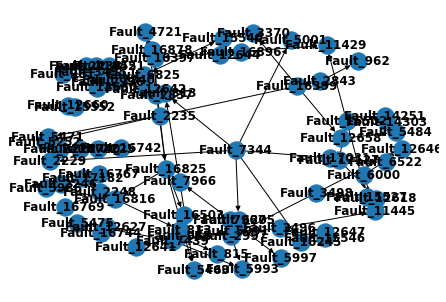

In [5]:
  
if(save_faults):
    m2l_topology.parse_fault_relationships('../test_data3/graph/','../test_data3/tmp/','../test_data3/output/')


In [6]:

if(save_faults):
    output_path='../test_data3/output/'

    faults_len=pd.read_csv(output_path+'fault_dimensions.csv')

    n_allfaults=len(faults_len)

    fcount=0
    for i in range(0,n_allfaults):
        f.write('GeomodellerTask {\n')
        f.write('CreateFault {\n')
        ostr='    name: "'+faults_len.iloc[i]["Fault"]+'"\n'
        f.write(ostr)

        ostr='    red: '+str(random.randint(1,256)-1)+'\n'
        f.write(ostr)

        ostr='    green: '+str(random.randint(1,256)-1)+'\n'
        f.write(ostr)

        ostr='    blue: '+str(random.randint(1,256)-1)+'\n'
        f.write(ostr)

        f.write('    }\n')
        f.write('}\n')
        fcount=fcount+1

    print(fcount,'of',n_allfaults)

103 of 103


### Create Orientations and contacts

In [7]:
f.write('#---------------------------------------------------------------\n')
f.write('#-----------------------Import 3D data ---Base Model------------\n')
f.write('#---------------------------------------------------------------\n')

f.write('GeomodellerTask {\n')
f.write('    ReadAndImport3dData {\n')
f.write('        contact_csv_file: "./output/contacts_clean.csv"\n')
f.write('        foliation_csv_file: "./output/orientations_clean.csv"\n')
f.write('        operation: Import_default; # make the most intelligent decision in the context.. if a named formation, add to it etc.\n')
f.write('        contact_header_linestoSkip: 1;\n')
f.write('        foliation_header_linestoSkip: 1;\n')
f.write('        fault_limit_header_linestoSkip: 1;\n')
f.write('        spatial_location_error: 1;\n')
f.write('        vertical_location_error: 1;\n')
#f.write('        Treat_Tag_As_Text_Only: true;\n')
f.write('    }\n')
f.write('}\n')


2

### Create Fault Orientations and Contacts

In [8]:
if(save_faults):
    f.write('GeomodellerTask {\n')
    f.write('    ReadAndImport3dData {\n')
    f.write('        operation: CreateFault;\n')
    f.write('        contact_csv_file: "./output/faults.csv"\n')
    f.write('        foliation_csv_file: "./output/faults_orientations.csv"\n')
    f.write('        limits_csv_file: "./output/fault_dimensions.csv"\n')
    f.write('        contact_header_linestoSkip: 1;\n')
    f.write('        foliation_header_linestoSkip: 1;\n')
    f.write('        fault_limit_header_linestoSkip: 1;\n')
    f.write('        spatial_location_error: 1;\n')
    f.write('        vertical_location_error: 1;\n')
    f.write('    }\n')
    f.write('}\n')


### Create Fault/Fault Relationships

Fault_313 Fault_2837
Fault_2837 Fault_4721
Fault_2837 Fault_16397
Fault_2837 Fault_16825
Fault_813 Fault_958
Fault_958 Fault_815
Fault_958 Fault_12641
Fault_958 Fault_16503
Fault_16503 Fault_813
Fault_2225 Fault_16740
Fault_16740 Fault_2227
Fault_2235 Fault_2843
Fault_2235 Fault_5252
Fault_2235 Fault_5471
Fault_2843 Fault_962
Fault_5471 Fault_5252
Fault_2248 Fault_16769
Fault_16397 Fault_4721
Fault_16397 Fault_16878
Fault_16825 Fault_16503
Fault_16825 Fault_7966
Fault_16825 Fault_5463
Fault_16825 Fault_16878
Fault_16825 Fault_16816
Fault_2840 Fault_3495
Fault_2996 Fault_2840
Fault_2996 Fault_3495
Fault_2996 Fault_961
Fault_2996 Fault_8551
Fault_2996 Fault_12630
Fault_8551 Fault_11442
Fault_12630 Fault_961
Fault_2997 Fault_5993
Fault_3496 Fault_7439
Fault_3496 Fault_11445
Fault_3496 Fault_15546
Fault_7439 Fault_5993
Fault_7439 Fault_5991
Fault_7439 Fault_5475
Fault_3498 Fault_2997
Fault_3498 Fault_12646
Fault_5991 Fault_2997
Fault_6000 Fault_11445
Fault_6000 Fault_12646
Fault_6205 Fault

[['Fault_15552', 'Fault_12660'],
 ['Fault_7966', 'Fault_313', 'Fault_2837', 'Fault_16825'],
 ['Fault_16503', 'Fault_813', 'Fault_958']]

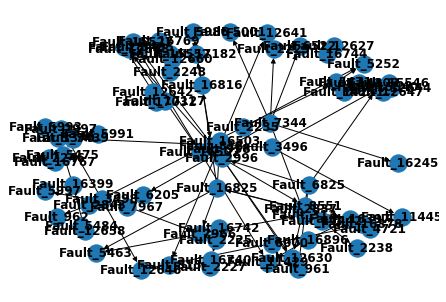

In [9]:
if(save_faults):
    G=nx.read_gml(tmp_path+"fault_network.gml",label='label')
    nx.draw(G, with_labels=True, font_weight='bold')
    edges=list(G.edges)
    for i in range(0,len(edges)):
        print(edges[i][0],edges[i][1])
    cycles=list(nx.simple_cycles(G))
    display(cycles)
    f.write('#---------------------------------------------------------------\n')
    f.write('#-----------------------Link faults with faults ----------------\n')
    f.write('#---------------------------------------------------------------\n')
    f.write('GeomodellerTask {\n')
    f.write('    LinkFaultsWithFaults {\n')

    for i in range(0,len(edges)):
            found=False
            for j in range(0,len(cycles)):
                if(edges[i][0]== cycles[j][0] and edges[i][1]== cycles[j][1]):
                    found=True # fault pair is first two elements in a cycle list so don't save to taskfile
            if(not found):
                ostr='        FaultStopsOnFaults{ fault: "'+edges[i][1]+'"; stopson: "'+edges[i][0]+'"}\n'
                f.write(ostr)

    f.write('    }\n')
    f.write('}\n')

### Create Fault/Series Relationships

In [10]:
if(save_faults):
    all_fault_group=np.genfromtxt(output_path+'group-fault-relationships.csv',delimiter=',',dtype='U25')
    ngroups=len(all_fault_group)
    all_fault_group=np.transpose(all_fault_group)
    nfaults=len(all_fault_group)

    f.write('#---------------------------------------------------------------\n')
    f.write('#-----------------------Link series with faults ----------------\n')
    f.write('#---------------------------------------------------------------\n')
    f.write('GeomodellerTask {\n')
    f.write('    LinkFaultsWithSeries {\n')

    for i in range(1,nfaults):
        first=True
        for j in range(1,ngroups):
            if(all_fault_group[i,j]==str(1)):
                if(first):
                    ostr='    FaultSeriesLinks{ fault: "'+all_fault_group[i,0]+'"; series: ['
                    f.write(ostr)
                    ostr='"'+all_fault_group[0,j]+'"'
                    f.write(ostr)
                    first=False
                else:
                    ostr=', "'+all_fault_group[0,j]+'"'
                    f.write(ostr)
        if(not first):
            ostr=']}\n'
            f.write(ostr)

    f.write('    }\n')
    f.write('}\n')


### Finalise Model

In [11]:
f.write('GeomodellerTask {\n')
f.write('    SaveProjectAs {\n')
f.write('        filename: "./Models_Prelim/Models_UWA.xml"\n')
f.write('    }\n')
f.write('}\n')
f.write('#---------------------------------------------------------------\n')
f.write('#----------------------------Compute Model----------------------\n')
f.write('#---------------------------------------------------------------\n')
f.write('\n')
f.write('GeomodellerTask {\n')
f.write('    ComputeModel {\n')
f.write('        SeriesList {\n')
f.write('            node: "All"\n')
f.write('        }\n')
f.write('        SectionList {\n')
f.write('            node: "All"\n')
f.write('        }\n')
f.write('        Extents {\n')
f.write('            xmin: 500000\n')
f.write('            ymin: 7455500\n')
f.write('            zmin: -3000\n')
f.write('            xmax: 603000\n')
f.write('            ymax: 7568000\n')
f.write('            zmax: 1000\n')
f.write('        }\n')
f.write('        radius: 10.0\n')
f.write('    }\n')
f.write('}\n')
f.write('#---------------------------------------------------------------\n')
f.write('#-----------------------Add geophysical Properties--------------\n')
f.write('#---------------------------------------------------------------\n')
f.write('\n')
f.write('\n')
f.write('\n')
f.write('#---------------------------------------------------------------\n')
f.write('#--------------------------Export Lithology Voxet---------------\n')
f.write('#---------------------------------------------------------------\n')
f.write('GeomodellerTask {\n')
f.write('    SaveLithologyVoxet {\n')
f.write('        nx: 100\n')
f.write('        ny: 100\n')
f.write('        nz: 400\n')
f.write('        LithologyVoxetFileStub: "./Litho_Voxet/LithoVoxet.vo"\n')
f.write('    }\n')
f.write('}\n')
f.write('#---------------------------------------------------------------\n')
f.write('#--------------------------Save As Model------------------------\n')
f.write('#---------------------------------------------------------------\n')
f.write('\n')
f.write('GeomodellerTask {\n')
f.write('    SaveProjectAs {\n')
f.write('        filename: "./Models_Final/Models_UWA.xml"\n')
f.write('    }\n')
f.write('}\n')


2

In [12]:
f.close()